In this lab we will review some basics of pytorch. Save your answers for this lab as they will be used for part of Lab 2. 



(1) Create a dataloader for the MNIST training data using torchvision package. Have your dataloader iterate over the training set outputing mini-batches of size 256 image samples. Note you do not need to use the image labels in this lab. You may follow the example in the official pytorch examples: 

https://github.com/pytorch/examples/blob/master/mnist/main.py#L112-L120


In [195]:
import numpy as np
import math
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [196]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [201]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [204]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
print(example_data.shape)

torch.Size([256, 1, 28, 28])


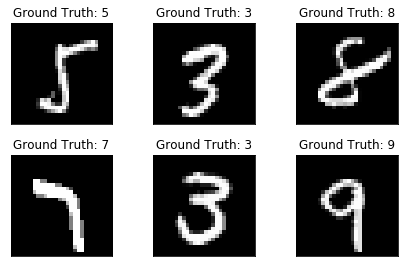

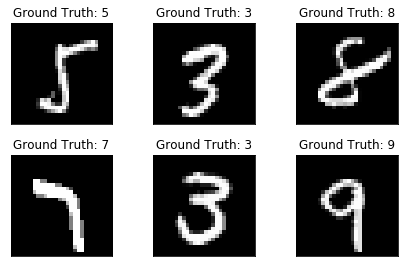

In [203]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
#   print(len(torch.flatten(example_data[i+10][0])))
  plt.imshow(example_data[i+10][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i+10]))
  plt.xticks([])
  plt.yticks([])
fig
    

(2) Using only torch primitives (e.g. torch.matmul, torch._relu, etc) implement a simple feedforward neural network with 2 hidden layers that takes as input MNIST digits and outputs a single scalar value. You may select the hidden layer width (greater than 20) and activations (tanh, relu, sigmoid, others) as desired.  Initialize the weights and biases with uniform random values in the range -1 to 1. Avoid using any functions from torch.nn class. Using the loop from (1) Forward pass through the dataset in mini-batches of 256 and record the time this takes. 

In [205]:
# generating some random features
#     print(features)
#     print(features.shape)
# define the weights
# W1 = torch.randn((784, 12), requires_grad=True)
import timeit
params={"W1":torch.FloatTensor(784, 12).uniform_(-1, 1),
    # print(W1)
    "W2": torch.FloatTensor(12, 10).uniform_(-1, 1), #torch.randn((12, 10), requires_grad=True)
    "W3": torch.FloatTensor(10, 1).uniform_(-1, 1), #torch.randn((10, 1), requires_grad=True)
    # define the bias terms
    "B1": torch.FloatTensor(12).uniform_(-1, 1), #torch.randn((12), requires_grad=True)
    "B2": torch.FloatTensor(10).uniform_(-1, 1), #torch.randn((10), requires_grad=True)
    "B3": torch.FloatTensor(1).uniform_(-1, 1), #torch.randn((1), requires_grad=True)]
       }

In [206]:

def my_simple_ff_nn(img,nn_params):      
    W1=nn_params["W1"]
    W2=nn_params["W2"]
    W3=nn_params["W3"]
    B1=nn_params["B1"]
    B2=nn_params["B2"]
    B3=nn_params["B3"]
    features = torch.flatten(img).reshape(-1)
        # calculate hidden and output layers
    h1 = F.relu((features @ W1) + B1)
    h2 = F.relu((h1 @ W2) + B2)
    output = torch.sigmoid((h2 @ W3) + B3)
    print(output.item())

start = timeit.default_timer()   
for idx in range(len(example_data)):
     my_simple_ff_nn(example_data[idx][0],params)
stop = timeit.default_timer()
print('FF 256 images Time= :',stop - start) 

1.4402577797056892e-08
4.507679587600444e-16
0.9999852180480957
1.6640108180254742e-09
7.80124437271823e-11
0.9999995231628418
0.5415602326393127
1.790246528798889e-08
2.4867345516099704e-08
4.730475733349948e-11
0.9545738697052002
3.9292109477173653e-07
6.954677519388497e-05
2.8942963581357617e-06
6.483115004110346e-16
1.8606501701792094e-15
4.46362148631696e-11
5.756077281482419e-10
1.614570237506996e-07
1.1819055411153944e-18
1.0
0.9999982118606567
1.861804026884523e-26
5.697913696423029e-09
7.362937841891293e-13
3.2223538255493622e-06
0.0029047552961856127
0.12742029130458832
0.0029612232465296984
9.802370503839142e-13
4.693649440466741e-13
6.734572899347313e-09
9.653705319578876e-07
0.0008177683921530843
0.0007500430219806731
2.176302336545499e-20
3.252176247769967e-05
6.777034286642447e-06
2.586648975011485e-07
2.2797326092866e-12
1.1692201651314349e-09
0.00046810111962258816
1.3473541002895217e-06
1.3107412163488013e-28
0.12671048939228058
0.6211549639701843
2.900422957363702e-1

(3) Implement a new torch.nn.module that performs the equivalent of the network in (2). Initialize it with the same weights and validate the outputs of this network is the same as the one in (2) on MNIST training set.

In [207]:
# define the network class
class my_torch_nn(nn.Module):
    def __init__(self):
        # call constructor from superclass
        super().__init__()        
        # define network layers
        self.fc1 = nn.Linear(784, 12)
        self.fc2 = nn.Linear(12, 10)
        self.fc3 = nn.Linear(10, 1)
        self.b1=params["B1"]
        self.b2=params["B2"]
        self.b3=params["B3"]
        
    def forward(self, x):
        x= torch.flatten(x).reshape(-1)
        x.requires_grad_(True)
        # define forward pass
        x = F.relu(self.fc1(x)+self.b1)
        x = F.relu(self.fc2(x)+self.b2)
        x = torch.sigmoid(self.fc3(x)+self.b3)
#         print(x.item())
        return x
def weights_init_uniform(m):
        classname = m.__class__.__name__
        # for every Linear layer in a model..
        if classname.find('Linear') != -1:
            # apply a uniform distribution to the weights and a bias=0
            m.weight.data.uniform_(-1, 1.0)
            m.bias.data.uniform_(-1, 1.0)


In [208]:
network = my_torch_nn()
network.apply(weights_init_uniform)
print(network)

my_torch_nn(
  (fc1): Linear(in_features=784, out_features=12, bias=True)
  (fc2): Linear(in_features=12, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=1, bias=True)
)


In [212]:
start = timeit.default_timer()   
for idx in range(len(example_data)):
    out=network(example_data[idx][0])
    print(out.item())
stop = timeit.default_timer()
print('FF 256 images Time= :',stop - start) 

0.9917540550231934
1.0
3.567948078853078e-05
0.9346117973327637
0.6078295111656189
1.0
0.0036443835124373436
0.02089640311896801
6.486820893769618e-07
0.9999998807907104
1.1377377262533628e-07
7.598759452775994e-07
0.0009539852617308497
0.9999992847442627
1.0
0.006148576270788908
1.0
3.0443759897025302e-05
1.0
0.998969316482544
1.0
4.9460263063585276e-20
1.0
8.881455814569875e-19
1.0
4.6736272756595434e-14
2.4547870403068828e-09
1.0
1.0
0.003484695451334119
0.2297322303056717
0.9760248064994812
1.044636701408308e-05
3.120041031090537e-11
0.12806713581085205
1.0
1.0
0.9999998807907104
0.9410972595214844
6.196972451451266e-18
1.0
1.0
1.2419676398423007e-09
1.0
0.0096505181863904
8.0370855803924e-11
0.9547421336174011
1.0
1.0
1.0
4.318089497079569e-10
1.0
0.43043747544288635
1.0
1.0
1.0
1.0
0.002916357247158885
2.1210651084402343e-06
8.052815246628597e-06
0.0035085310228168964
0.9999955892562866
5.719215587771977e-15
0.9998886585235596
1.2634658332899562e-06
2.3455434643160356e-13
0.99441

(4) For a batch of 256 random samples, compute the gradient of the average of the neural network outputs (over the batch) w.r.t to the weights using torch autograd. Compute the gradients for the torch.nn based model in (3) and validate the gradients match those from those computed with (2). 

**Note**: The network here is $f: \mathcal{R}^{HW}\rightarrow\mathcal{R}$, with $256$ samples you should obtain $o=\frac{1}{256}\sum_{i=0}^{255}f(x_i)$. You are asked to find $\nabla_w o$ for all the parameters $w$.

In [213]:
loss_fn = torch.nn.MSELoss(reduction='sum')
for idx in range(len(example_data)):
#     print(example_targets[idx])
    output = network(example_data[idx][0])
    loss = output-example_targets[idx]
    loss.backward()
#     print(output.grad)
    

In [215]:
print('fc1 avg grad=\n',sum(network.fc1.weight.grad)/len(network.fc1.weight.grad)) 
print('fc1 bais=',network.fc1.bias.grad)
print('fc2 avg grad=\n',sum(network.fc2.weight.grad)/len(network.fc2.weight.grad)) 
print('fc2 bais=',network.fc2.bias.grad)

fc1 avg grad=
 tensor([-2.9697e-02, -2.9697e-02, -2.9697e-02, -2.9697e-02, -2.9697e-02,
        -2.9697e-02, -2.9697e-02, -2.9697e-02, -2.9697e-02, -2.9697e-02,
        -2.9697e-02, -2.9697e-02, -2.9697e-02, -2.9697e-02, -2.9697e-02,
        -2.9697e-02, -2.9697e-02, -2.9697e-02, -2.9697e-02, -2.9697e-02,
        -2.9697e-02, -2.9697e-02, -2.9697e-02, -2.9697e-02, -2.9697e-02,
        -2.9697e-02, -2.9697e-02, -2.9697e-02, -2.9697e-02, -2.9697e-02,
        -2.9697e-02, -2.9697e-02, -2.9697e-02, -2.9697e-02, -2.9697e-02,
        -2.9697e-02, -2.9697e-02, -2.9697e-02, -2.9697e-02, -2.9697e-02,
        -2.9697e-02, -2.9697e-02, -2.9697e-02, -2.9697e-02, -2.9697e-02,
        -2.9697e-02, -2.9697e-02, -2.9697e-02, -2.9697e-02, -2.9697e-02,
        -2.9697e-02, -2.9697e-02, -2.9697e-02, -2.9697e-02, -2.9697e-02,
        -2.9697e-02, -2.9697e-02, -2.9697e-02, -2.9697e-02, -2.9697e-02,
        -2.9697e-02, -2.9697e-02, -2.9697e-02, -2.9697e-02, -2.9697e-02,
        -2.9693e-02, -3.0182e-02, -3

(5) Perform  the forward and backward passes from (3), 10 times on cpu and 10 times on gpu, report the average time for both. Repeat this for just the forward pass. In the end you should obtain 4 average run times (forward and backward, forward only) x (cpu, gpu) 

In [216]:
import timeit
loss_fn = torch.nn.MSELoss(reduction='sum')

total_t=0
for iter in range(10):
    start = timeit.default_timer()
    for idx in range(len(example_data)):
        output = network(example_data[idx][0])
        loss = output-example_targets[idx]
        loss.backward()
    stop = timeit.default_timer()
    total_t=total_t+(stop - start)
print('avg_forward and backward_cpu_time=',total_t/10,'\n')

total_t=0
for iter in range(10):
    start = timeit.default_timer()
    for idx in range(len(example_data)):
        output = network(example_data[idx][0])
    stop = timeit.default_timer()
    total_t=total_t+(stop - start)
print('avg_forward_cpu_time=',total_t/10,'\n')

avg_forward and backward_cpu_time= 0.4352928799002257 

avg_forward_cpu_time= 0.2147864459999255 

